In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mph.mph import MPH
from mph.utilities import plot_spectrum

In [2]:
vibmax = 5

Ef = 14000
ECT = 14000
ECTInf = 0
omega = 1400

lambda_f = 1.0
lambda_c = np.sqrt(0.5)
lambda_a = np.sqrt(0.5)

In [3]:
nmol = 1
J = np.zeros(nmol)
te = np.zeros(nmol)
th = np.zeros(nmol)

monomer = MPH(1, vibmax, omega, Ef, J, lambda_f) # J > 0, H-aggregate
monomer.kernel()
monomer.get_abs_spectrum(gamma=0.28*omega, window=35000)

In [18]:
# Simulation to match Figure 6 in Hestand, Spano, Acc. Chem. Res. 2017, 50, 341 - 350
nmol = 10

J = np.zeros(nmol)

te = 1400
th = 1400
J[1] = 0

Jagg = MPH(nmol, vibmax, omega, Ef, J, lambda_f,
           ECT=ECT, ECTInf=ECTInf, te=te, th=th, lambda_c=lambda_c, lambda_a=lambda_a, do_ct=True) # Jc < 0
Jagg.kernel()

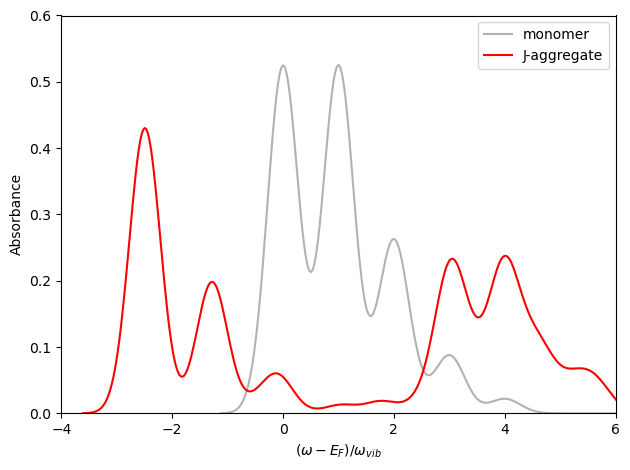

In [19]:
Jagg.get_abs_spectrum(gamma=0.28*omega, window=35000)

plt.plot((monomer.photon_energy - Ef)/omega, monomer.absorbance, color="black", alpha=0.3, label="monomer")
plt.plot((Jagg.photon_energy - Ef)/omega, Jagg.absorbance, color="red", label="J-aggregate")
plt.ylim([0, 0.6])
plt.xlim([-4, 6])
plt.legend(loc=1)
plt.ylabel("Absorbance")
plt.xlabel(r"$(\omega - E_F)/\omega_{vib}$") 

plt.tight_layout()

In [6]:
# Simulation to match Figure 6 in Hestand, Spano, Acc. Chem. Res. 2017, 50, 341 - 350
nmol = 10

J = np.zeros(nmol)

te = 1400
th = -1400
J[1] = 0

Hagg = MPH(nmol, vibmax, omega, Ef, J, lambda_f,
           ECT=ECT, ECTInf=ECTInf, te=te, th=th, lambda_c=lambda_c, lambda_a=lambda_a, do_ct=True) 
Hagg.kernel()

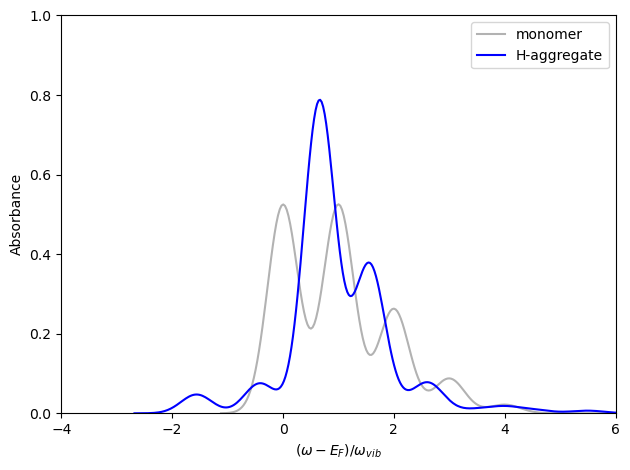

In [7]:
Hagg.get_abs_spectrum(gamma=0.28*omega, window=35000)

plt.plot((monomer.photon_energy - Ef)/omega, monomer.absorbance, color="black", alpha=0.3, label="monomer")
plt.plot((Hagg.photon_energy - Ef)/omega, Hagg.absorbance, color="blue", label="H-aggregate")
plt.ylim([0, 1.0])
plt.xlim([-4, 6])
plt.legend(loc=1)
plt.ylabel("Absorbance")
plt.xlabel(r"$(\omega - E_F)/\omega_{vib}$") 

plt.tight_layout()